# Week 6: More containers and sequences, comprehensions, and methods for problem-solving

This week, we introduce **tuples** and **dictionaries**, two other types of *container* available in Python. We also introduce **comprehensions** as a concise way to create lists and other sequences. Finally, we look at an example of a recursive function, and we outline the different steps one should take to design an algorithm to solve a particular problem.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [1]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w06_solutions.md')

---
## Tuples

**Tuples** share similarities with lists; an important difference is that tuples are **immutable** --- that is, you cannot change its elements after it is defined. A tuple can be created by typing a sequence of values separated by a comma, surrounded by round brackets `(...)`. For example,
```
a = (4, 6, -2, 4, 0, 0)
```
We can access elements or subsequences of a tuple using indexing and slicing, just as for lists. Many of the functions and some of the operators we have used to operate on lists can also be used with tuples. For example:

In [2]:
a = (4, 6, -2, 4, 0, 0)     # A tuple of numbers
b = ()                      # An empty tuple
c = (2, 2, (-4, 5), 2)      # A nested tuple
d = (0.1, 'that', 2)        # Tuples can also contain mixed data
e = (8,)                    # A tuple with 1 element -- note the trailing comma!

# We can nest tuples in lists...
f = [(1, 2), (), e, ('this', 'maybe')]

# ... and lists in tuples
g = ([3, 4], [3], 0, [0.122, -0.1])

# Indexing and slicing also work on tuples
print('Indexing:')
print(a[2:])
print(g[3][0])
print(f[:3])

# Some functions we can use...
print('\nFunctions:')
print(len(d))
print(sorted(a))        # Note that sorted() still returns a list!
print(tuple(sorted(a))) # Casting a list to a tuple
print(list(d))          # Casting a tuple to a list

# And some operators...
print('\nOperators:')
print(d + c)
print((2, -0.33) * 5)
print(e in f)

Indexing:
(-2, 4, 0, 0)
0.122
[(1, 2), (), (8,)]

Functions:
3
[-2, 0, 0, 4, 4, 6]
(-2, 0, 0, 4, 4, 6)
[0.1, 'that', 2]

Operators:
(0.1, 'that', 2, 2, 2, (-4, 5), 2)
(2, -0.33, 2, -0.33, 2, -0.33, 2, -0.33, 2, -0.33)
True


A useful feature is that variables can be **unpacked** from a tuple, meaning that we can, for example, assign the value of each element in a tuple to a different variable, in one line:

In [3]:
u, v, w = (3.4, 1, 'friday')
print(f'{u}, {w}')

# Swap 2 values
u, w = w, u
print(f'{u}, {w}')

3.4, friday
friday, 3.4


This is what you do when you write a function which returns multiple output values -- in reality, it returns one tuple containing the output values.

---
**Note:** Lists, tuples, and strings are examples of **sequences**, meaning that their elements (for a `str`, its characters) are *ordered*, and indexed by a number representing their position. Index slicing can also be used on any sequence type.

---
**📚 Learn more:**
* [Tuples and Sequences - Python documentation](https://docs.python.org/3/tutorial/datastructures.html?highlight=lists#tuples-and-sequences)
* [Sequence types: list, tuple, range - Python documentation](https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range)
---

## Dictionaries

A Python **dictionary** is a set of ***key-value* pairs**. Each value is indexed by a distinct key, which may be a number, a string, or a tuple of numbers or strings. (In contrast, each value in a list or a tuple is indexed by a positive integer, corresponding to its position.) Dictionary values can be any object (e.g. numbers, sequences, booleans, even other nested dictionaries).

A dictionary can be created from a comma-separated list of `key: value` pairs, surrounded by curly brackets `{}`, for example

In [4]:
scores = {'Alice': 80, 'Bob': 64, 'Charlie': 72}
print(scores['Bob'])

64


<div style="width:70%;margin:auto;">

| `scores = {'Alice': 80, 'Bob': 64, 'Charlie': 72}` |
|:--:|
| ![The dictionary scores in memory](img/dict.png) |

</div>

Dictionaries are useful to hold data which it doesn't make sense to index by number -- here, for example, it's much easier to keep track of the students' grades if they're indexed with their name, instead of some arbitrary integer number.

The following *dictionary methods* allow you to access the elements of a dictionary in different ways. Make sure to run the cell above beforehand to define the `scores` dictionary.

In [5]:
print(scores)                # Print the dictionary object
print(list(scores.items()))  # Print dict items as a list of tuples
print(list(scores.keys()))   # Print all keys in a list
print(list(scores.values())) # Print all values in a list

{'Alice': 80, 'Bob': 64, 'Charlie': 72}
[('Alice', 80), ('Bob', 64), ('Charlie', 72)]
['Alice', 'Bob', 'Charlie']
[80, 64, 72]


We can add and modify dictionary entries, or check whether a *key* exists in a dictionary:

In [6]:
# Create an empty dictionary
my_dict = {}

# Add 3 new items -- note that we don't need to append with dictionaries
my_dict['First item'] = (4, 5)
my_dict['Second item'] = 'blue'
my_dict[(0, 1)] = True
print(my_dict)
print(len(my_dict))

# Modify one item
my_dict['Second item'] = 8.77
print(my_dict)

# Check if a key (not a value!) exists in the dictionary
print((0, 1) in my_dict)
print((4, 5) in my_dict)

{'First item': (4, 5), 'Second item': 'blue', (0, 1): True}
3
{'First item': (4, 5), 'Second item': 8.77, (0, 1): True}
True
False


---
**📚 Learn more:**
* [Dictionaries - Python documentation](https://docs.python.org/3/tutorial/datastructures.html?highlight=lists#dictionaries) - introduction and some examples.
* [Mapping types - Dictionary - Python documentation](https://docs.python.org/3/library/stdtypes.html#typesmapping) - includes a list of operations which dictionaries support.
---

🚩 **Exercise 1**

The dictionary `grades` below contains the grades that 3 students, Alice, Bob, and Charlie, obtained so far this semester in their school subjects. Complete the code (without touching the first 3 lines!) to:

- update Alice's maths grade to a B, and
- add a new C grade in English for Charlie,
- add grades for a new student, Dara, with a B in maths and a D in history.

In [9]:
grades = {'Alice': {'maths': 'A', 'english': 'C', 'music': 'B'},
          'Bob': {'maths': 'C', 'english': 'A', 'history': 'A'},
          'Charlie': {'physics': 'D', 'music': 'A', 'biology': 'A'}}

grades['Alice']['maths'] = 'B'
grades['Charlie']['english'] = 'C'
# grades['Dara'] = {}
# grades['Dara']['maths'] = 'B'
# grades['Dara']['history'] = 'D'
grades['Dara'] = {'maths': 'B', 'history': 'D'}

print(grades)

{'Alice': {'maths': 'B', 'english': 'C', 'music': 'B'}, 'Bob': {'maths': 'C', 'english': 'A', 'history': 'A'}, 'Charlie': {'physics': 'D', 'music': 'A', 'biology': 'A', 'english': 'C'}, 'Dara': {'maths': 'B', 'history': 'D'}}


In [10]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

### Looping over dictionaries

A convenient way to loop over a dictionary uses the `.items()` method to return a list of tuples.

In [11]:
months_length = {'January': 31, 'February': 28, 'March': 31 ,'April': 30,
                 'May': 31 ,'June': 30, 'July': 31, 'August': 31, 'September': 30,
                 'October': 31, 'November': 30, 'December': 31}

out = 'The months of '

print(months_length.items())

for month, duration in months_length.items():
    if duration == 31:
        out = out + month + ', '

out = out + 'have 31 days.'
print(out)

dict_items([('January', 31), ('February', 28), ('March', 31), ('April', 30), ('May', 31), ('June', 30), ('July', 31), ('August', 31), ('September', 30), ('October', 31), ('November', 30), ('December', 31)])
The months of January, March, May, July, August, October, December, have 31 days.


---
🚩 **Exercise 2**

Build a new dictionary `grades_by_subject` (where the keys are the different subjects in `grades` and the values are nested dictionaries) by looping over `grades` (from Exercise 1, where the keys are the students' names and the values are nested dictionaries).

In [15]:
grades_by_subject = {}

for student, all_grades in grades.items():
    for subject, grade in all_grades.items():
        if subject not in grades_by_subject:
            # Subject key doesn't exist yet, create it and add the current student
            grades_by_subject[subject] = {student: grade}
        else:
            # Subject key exist, add a new entry to the (nested) value dict
            grades_by_subject[subject][student] = grade

print(grades_by_subject)

{'maths': {'Alice': 'B', 'Bob': 'C', 'Dara': 'B'}, 'english': {'Alice': 'C', 'Bob': 'A', 'Charlie': 'C'}, 'music': {'Alice': 'B', 'Charlie': 'A'}, 'history': {'Bob': 'A', 'Dara': 'D'}, 'physics': {'Charlie': 'D'}, 'biology': {'Charlie': 'A'}}


In [13]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---

## Comprehensions

Comprehensions are a nice feature of Python not found in many other languages. In a sense they are a combination of sequence, for loop and if statement. They allow us to construct a new sequence from an old sequence, doing some operation for each element of the original sequence. Here is an example:

In [19]:
square_numbers = [1, 4, 9, 16, 25]
square_plus1 = [x+1 for x in square_numbers]
print(square_plus1)

[2, 5, 10, 17, 26]


The general syntax for **list comprehensions** is 

```python
[expression for item in seq if condition]                   # if
[expression1 if condition else expression2 for item in seq] # if-else
```

You can also use comprehensions for building other sequences -- dictionaries, tuples, etc. Comprehensions can make your code more compact and readable.

---
**📚 Learn more:**

- [List comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [Displays for lists, sets and dictionaries](https://docs.python.org/3/reference/expressions.html#displays-for-lists-sets-and-dictionaries)


---
🚩 **Exercise 3**

Try to write the following loop in one line with a list comprehension.

In [20]:
#  In the sequence n**2+3 for n = 50 to 100, find the numbers which are divisors of 6
factors6 = []
for n in range(50, 101):
    if (n**2 + 3) % 6 == 0:
        factors6.append(n**2 + 3)
        
print(factors6)

[2604, 3252, 3972, 4764, 5628, 6564, 7572, 8652, 9804]


In [21]:
factors6_1 = [n**2 + 3 for n in range(50, 101) if (n**2 + 3) % 6 == 0]
print(factors6_1)

[2604, 3252, 3972, 4764, 5628, 6564, 7572, 8652, 9804]


In [22]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
Comprehensions can be **nested** in one another as well. Look at the example below where the prime numbers less than 100 are generated with one nested list comprehension:

In [24]:
primes = [x for x in range(2,100) if not [t for t in range(2,x) if not x%t]]
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


- The inner comprehension builds a list of all the factors of `x`, since `not x%t` is `True` when `x` is divisible by `t`. It gives an empty list if `x` doesn't have any factors (i.e. if `x` is prime).
- The outer comprehension builds a list by selecting the numbers `x` up to 100 for which the inner list is empty (since `not []` is `True`)-- i.e. the numbers `x` which are prime.

Here is another example: building and flattening matrices using nested comprehensions.

In [23]:
import numpy as np

# Build the identity matrix
I = np.array([[1 if i==j else 0 for i in range(4)] for j in range(4)])
print(f'I =\n{I}\n')

# Flatten a matrix to a list -- here, "i" is a list of the rows of A
A = np.random.randint(1, 10, size=[3, 3])
print(f'A =\n{A}\n')
print([j for i in A for j in i])

I =
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

A =
[[3 2 1]
 [1 8 3]
 [6 5 7]]

[3, 2, 1, 1, 8, 3, 6, 5, 7]


---
🚩 **Exercise 4**

In one line, using comprehensions, create a list of all 24 possible (ordered) combinations of the characters `a`, `b`, `c` which are not triplets. For instance, you list should contain `'aab'` and `'cba'`, but not `'bbb'`.

In [28]:
combinations = [i + j + k for i in 'abc' for j in 'abc' for k in 'abc' if not i==j==k]
print(combinations)

['aab', 'aac', 'aba', 'abb', 'abc', 'aca', 'acb', 'acc', 'baa', 'bab', 'bac', 'bba', 'bbc', 'bca', 'bcb', 'bcc', 'caa', 'cab', 'cac', 'cba', 'cbb', 'cbc', 'cca', 'ccb']


In [25]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## Designing algorithms

### Recursion

Recursion is a technical name for a procedure or function that **calls itself** in order to provide an answer. We are already quite familiar with the idea of a *recursion relation* in mathematics, and this is really a very similar concept.

To illustrate it, here is a reasonable simple recursion relation to define the factorial operation:
$$
n! = \left\{ \begin{array}{cc}
1, \qquad & \textrm{if}\,\, n=0 \\
n\cdot (n-1)! \qquad& \textrm{otherwise}
\end{array}\right.
$$

Here is how we would program that using a recursive function:

In [16]:
def factorial(n):
    '''
    Calculate n! = 1 x 2 x 3 x ... x (n-1) x n for a positive integer n, using a recursive method.
    We use the fact that n! = n x (n-1)!.
    '''
    if n == 0:
        print('We got to the bottom... Returning 0! = 1')
        return 1
    else:
        # Here, we call the function itself back with a different argument
        print(f'Returning {n} x {n-1}!')
        return n * factorial(n-1)

print(factorial(5))

import math
print(math.factorial(5))

Returning 5 x 4!
Returning 4 x 3!
Returning 3 x 2!
Returning 2 x 1!
Returning 1 x 0!
We got to the bottom... Returning 0! = 1
120
120


Note that, just like in the mathematical expression, we need to specify the initial value explicitly -- otherwise, we would go on forever! Also note that although the output looks like there is a loop somewhere, there isn't -- it's simply the recursive function calling itself over and over until it "bottoms out" and finds the initial value. Then, it can "chain-return" all these values all the way up to the top again. This is how the return value is computed with the input `3`:

```python
3 * fac(2)
3 * (2 * fac(1))
3 * (2 * (1 * fac(0)))   # here, we've bottomed out!
3 * (2 * (1 * 1))
3 * (2 * 1)
3 * 2
6
```


Recursion is an important tool in the Computer Science toolkit as a way to solve problems. Many problems have a simple solution by regarding them as recursive problems, and using a recursive function to solve them (8 Queens problem, Towers of Hanoi, finding greatest common divisor, etc).

---
🚩 **Exercise 5**

Write a **recursive** function `fib_rec()` which takes 3 input arguments:
- a positive integer `p`,
- a positive integer `q`,
- a positive integer `n` greater than 2,

and returns the `n`th element of the $(p,q)$-Fibonacci sequence $F(n)$ from the Week 2 workshop, defined by:

$$
F(1) = F(2) = 1,\\
F(n) = p F(n-1) + q F(n-2), \quad\textrm{for}\,\, n > 2.
$$

Test your function:
- `fib_rec(1, 1, 15)` should return `610`
- `fib_rec(6, 4, 10)` should return `5330944`
- `fib_rec(2, 1, 35)` should return `5168247530883`

In [18]:
def fib_rec(p, q, n):
    '''
    Return the nth element of the (p,q)-Fibonacci sequence.

    Input:
        p (int), positive integer, first coefficient
        q (int), positive integer, second coefficient
        n (int), positive integer

    Output:
        Fn (int), the nth element of the sequence, defined by
        F(n) = pF(n-1) + qF(n-2).
    '''
    if n == 1 or n == 2:
        return 1
    else:
        return p*fib_rec(p, q, n-1) + q*fib_rec(p, q, n-2)

print(fib_rec(1, 1, 15))
print(fib_rec(6, 4, 10))
print(fib_rec(2, 1, 35))        

610
5330944
5168247530883


In [17]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

You will notice that the last test takes quite a long time to evaluate. This is because for each call to the function, we generate 2 more calls back to the function. For each of these, there is an overhead in the computer -- for recursive methods to be efficient, these calls back to the function have to be well optimized by the language you use.

Sadly, Python is not good at optimising recursive functions, and so particularly where there are several calls back to the function they run **very slowly in Python** if at all. It is best to stick with using recursion only for quite simple problems -- it is not a structure that you should rely on in Python.

---

### A process for problem-solving

You have probably realised by now that learning programming is not just learning a language -- it's also learning to translate a mathematical or operational problem into a computational one. This ability is usually called *computational thinking*, and you will continue to develop it as you practise solving complex problems with Python.

The section "How to Design Algorithms" of [The Algorithm Design Manual](https://www8.cs.umu.se/kurser/TDBA77/VT06/algorithms/BOOK/BOOK3/NODE124.HTM#SECTION02700000000000000000) provides great problem-solving advice, as well as a detailed checklist designed to guide you through this translation process. Here are the important points on that checklist, to check in order:

- What is the **end goal** of the problem? What should the final result look like?
- What **data** do I have? What object **types** are best suited to store/handle which data?
- What should the rough **structure** of the algorithm be? What essential techniques are needed – loops/decisions, for/while...
- Can I break the problem down into **sub-tasks**?
- Does it have a **recursive** structure – can I do a little bit of it, and leave myself with a problem that looks almost the same?
- How do I know when I get an answer – can I check the answer? (sometimes answers that are hard to get are easy to check!)

It is always a good idea to start with (or go back to) **pen and paper**, before trying to write any code. Work out the maths, compute a small known example by hand to check your results, draw pictures and diagrams to help you visualise the problem and/or what your algorithm is doing...

#### Computational problem-solving in 7 steps

Computing educators in Duke University have outlined a **7-step guide to problem-solving**, which can be a very useful tool to work through a computing problem. [The 7 steps are described in this poster](https://adhilton.pratt.duke.edu/sites/adhilton.pratt.duke.edu/files/u37/iticse-7steps.pdf) -- I highly recommend that you read through it, and come back to it when you get stuck on a complex problem.

Note, in particular, that by following these steps, you should only start writing code in **step 5 of 7**!

---
**📚 Learn more:**
* [Problem solving and algorithms](http://sofia.cs.vt.edu/cs1114-ebooklet/chapter4.html) - This is a great resource, walking through the different steps of designing of an algorithm to solve a problem. The implementation is done with Java, not Python, but the steps and the principles are the same -- for practice, you could try to implement it in Python.
* [The Algorithm Design Manual](https://www8.cs.umu.se/kurser/TDBA77/VT06/algorithms/BOOK/BOOK/BOOK.HTM) - The source cited above -- a very complete online book on algorithm design.


---
### Problem-solving example: the Post Office problem

The [Post Office problem](https://en.wikipedia.org/wiki/Nearest_neighbor_search) is a nearest-neighbour search problem. Here is a related exercise:

> Consider a $5\times 5$ $km^2$ city, with $n$ post offices scattered at different (known) locations, and all roads are laid out in a grid. Produce a map to help the residents find the post office within the shortest walking distance from any point in the city.

You are given the following function to create the $n$ post offices at random locations. Run the cell to add it to the namespace.

In [30]:
import numpy as np

def create_POs(n):
    '''
    Create random coordinates for n post offices in the city.
    
    Input: n (int), the total number of POs.
    Output: POs (ndarray), random array of size nx2, each row giving
        the (x, y) coordinates for one post office.
    '''
    # Initialise our random number generator
    rng = np.random.default_rng()

    # Produce a random array of floats between 0.2 and 4.8 (not too close to city borders)
    POs = 0.2 + 4.6*rng.random(size=[n, 2])
    return POs

Let's have a look at these post offices to get a better idea of what we're working with. It's always a good idea to visualise your data or results.

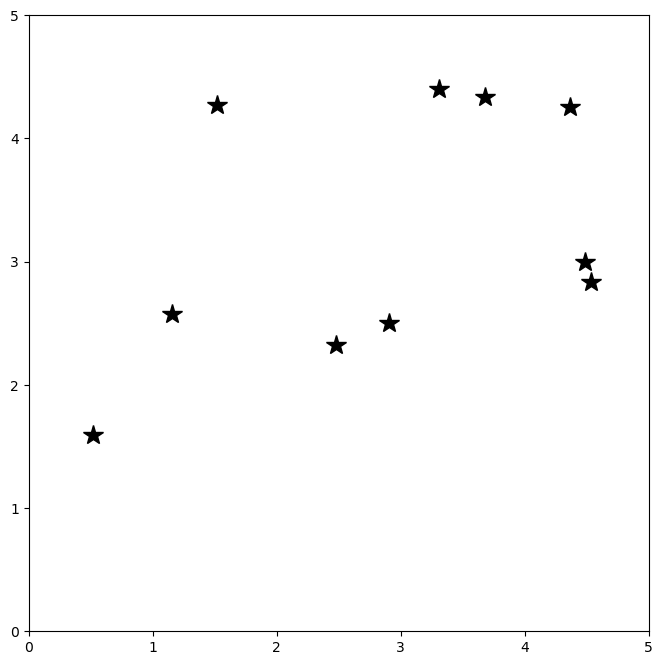

In [32]:
import matplotlib.pyplot as plt

# Create 10 post offices
n = 10
POs = create_POs(n)

# Plot their location
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(POs[:, 0], POs[:, 1], 'k*', markersize=15)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.show()

#### Designing the algorithm

Now, the solution -- let's go through the checklist to tackle this problem:

- What is the **end goal** of the problem? What should the final result look like?

    - We need to make a map of the city.
    - Anyone consulting the map should be able to easily choose a post office to walk to.
    - We could divide our city map into different areas, to represent the "catchment areas" of each post office.

- What **data** do I have? What object **types** are best suited to store/handle which data?

    - We have the locations of the $n$ post offices on a map (their $(x, y)$ coordinates).
    - We know the size and shape of the map ($5\times 5$ $km^2$).
    - We know that all the roads are laid out in a grid, which means that the shortest walking distance from one point to another can be calculated using the [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) metric. Numpy has the `np.linalg.norm()` function to help us calculate this, so it may be a good idea to use Numpy arrays to store the coordinate data.

- What should the rough **structure** of the algorithm be? What essential techniques are needed – loops/decisions, for/while...
    
    - One way to produce the map could be to simulate lots of residents at random places in the city, and to find the nearest post office for all of them. We could indicate the nearest post office for each simulated resident with a different colour. (Other algorithms do exist to separate the space into [Voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram), but here we choose an approximation/simulation approach.)
    - We will need to generate random $(x, y)$ coordinates for all the residents -- `np.random` can help with that.
    - We will need to calculate Manhattan distances between points -- again, `np.linalg.norm()` will help. We can loop over each resident and each post office to get all the possible distances.
    - We will need to find the closest post office for each resident -- `np.argmin()` can find the index of the smallest value in an array. We can use it to find which post office corresponds to the shortest distance for each resident.
    - We will need to display a map -- `matplotlib` will be useful. We'll need to find a way to pick $n$ different colours to draw each cluster of points -- we'll probably have to loop over the post offices to do this.

- Can I break the problem down into **sub-tasks**?

    - Simulate a fairly large population of residents.
    - Calculate the distance between a resident and a post office.
    - Find the closest post office for a resident.
    - Plot the locations of each post office, and each resident with a colour corresponding to the nearest PO.

- Does it have a **recursive** structure – can I do a little bit of it, and leave myself with a problem that looks almost the same?

    - No, it doesn't. Here, we need to calculate different distances for all the different residents.
    
- How do I know when I get an answer – can I check the answer? (sometimes answers that are hard to get are easy to check!)

    - We can calculate the distance between a resident and all the post offices, find the shortest one, and keep track of the corresponding post office.
    - The final map should help us check that our method is at least roughly correct. We should see clearly defined clusters around each post office, each with a different colour.


In [33]:
def make_residents(pop):
    '''
    Creates a uniformly distributed population of city
    residents on the map.
    
    Input: pop (int): positive integer, number of residents (population).
    
    Output: residents (ndarray): Numpy array with pop rows
            and 2 columns, each row is the (x, y) coordinates
            of 1 resident.
    '''
    rng = np.random.default_rng()
    
    # Create random (x, y) coordinates for "pop" residents, between 0 and 5
    residents = 5 * rng.random(size=[pop, 2])
    return residents

# A quick test to check that everything looks good for now
print(make_residents(5))

[[0.9592408  1.8366979 ]
 [2.73808145 1.22795136]
 [1.72134504 1.4298755 ]
 [0.84080217 3.90345921]
 [3.23918714 0.16774644]]


Next, calculate the Manhattan distance between a resident and a post office. This is the same as the 1-norm of the vector between the 2 points (resident and PO), and we already have a function to do that: [`np.linalg.norm()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm). The documentation tells us to specify that we want the 1-norm using the `ord=` keyword argument.

So if `res` is a Numpy array with 2 elements representing the $(x_r, y_r)$ location of a resident, and `po` is also an array representing the $(x_{po}, y_{po})$ location of a post office, the command
```python
np.linalg.norm(res - po, ord=1)
```
should let us compute the Manhattan distance
$$
d_1 = \left|x_r - x_{po}\right| + \left|y_r - y_{po}\right|.
$$

Now, to get all the distances between all the residents and all the post offices, we can use 2 nested loops: one over the post offices and one over the residents. We need to store all these distances: each resident will have $n$ distances, one to each post office. Our data structure could look like this:


| | Dist. to PO 1 | Dist. to PO 2 | Dist. to PO 3 | ... | Dist. to PO $n$ |
|--|--|--|--|--|--|
| Resident 1 | | | | | |
| Resident 2 | | | | | |
| Resident 3 | | | | | |
| ... | | | | | |

Finally, once we have all the distances, we need to find (for each person) which post office is the closest. If we use a NumPy array structure as above, we can use `np.argmin()` to find the index of the smallest distance for each row, which will give us the post office closest to that resident.

In [ ]:
def nearest_PO(residents, POs):
    '''
    Finds the closest post office to all residents.
    
    Input:
        residents (ndarray): array with "pop" rows and 2 columns,
            each row is the (x, y) coordinates of 1 resident.
        POs (ndarray): array with 2 columns, each row is the (x, y)
            coordinates of a post office.
    
    Output:
        closest (ndarray): index of the closest post office to each resident,
            in terms of Euclidean distance.
    '''
    # Prepare a list of lists to store all distances
    distances = []
    
    # Loop over post offices
    for po in POs:
        dist_po = []
        # Loop over residents
        for res in residents:
            # Get the 1-norm of each vector between a resident and a PO
            dist_po.append(np.linalg.norm(res - po, ord=1))
        
        # Add the list of distances for all residents to that PO
        distances.append(dist_po)
    
    # Convert our list of lists to a NumPy array (transpose it)
    distances = np.array(distances).T
    
    # Return the index of the nearest PO, along each row of the array (find the min for each resident)
    closest = np.argmin(distances, axis=1)
    return closest

How can we test this function? It's not very straightforward to test this alone -- let's first make our map-drawing function, as this will give us a way to visualise the results.

We can plot each resident in the same colour if they have the same closest post office. We can use Boolean indexing to decide which residents to plot a certain colour -- this will be *a lot faster* than drawing every point separately with a big loop!

We will loop over each post office, and draw all the residents with one command for that post office. We'll need to pick a different colour for each PO -- we could choose our colours in advance, and create a list of strings to use it in our call to `.plot()`. Alternatively, we can get a [`colormap` object from matplotlib](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), and just pick a colour somewhere along that gradient as we loop over the post offices.

In [ ]:
def draw_PO_map(residents, POs):
    '''
    Display the nearest post office on the map for a population
    of residents, in different colours.
    
    Input:
        residents (ndarray): array with "pop" rows and 2 columns,
            each row is the (x, y) coordinates of 1 resident.
        POs (ndarray): array with n rows and 2 columns, each row
            is the (x, y) coordinates of 1 post office.
    
    Output: None
    '''
    # Get population size
    pop = residents.shape[0]
    
    # Set up a figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    
    # Make a colour map for the post offices
    colour_map = plt.get_cmap('gist_rainbow')
    colours = []
    n = POs.shape[0]
    for c in range(n):
        # Extract one colour, a fraction of the way into the colour map.
        # colour_map(0) gives us the leftmost colour in the 'gist_rainbow' map,
        # colour_map(1) gives us the rightmost colour.
        colours.append(colour_map(c/n))

    # Find the nearest PO for each resident, using the function we made earlier
    closest = nearest_PO(residents, POs)
    
    # Draw each cluster of residents with a different colour
    for po in range(n):
        # Boolean indexing: extract the rows (the residents) for whom "closest" is the current post office
        x = residents[closest == po, 0]
        y = residents[closest == po, 1]
        ax.plot(x, y, '.', color=colours[po], markersize=8)
    
    # Draw markers for each post office
    ax.plot(POs[:, 0], POs[:, 1], 'k*', markersize=15)
    plt.show()

#### The moment of truth!

Let's use all our functions to solve the task now -- finally!

In [ ]:
# Decide how many residents we want, and create them
pop = 10000
residents = make_residents(pop)

# Open our post offices across the city
n = 30
POs = create_POs(n)

# Now, draw the map!
draw_PO_map(residents, POs)

That seems to work! 🎉

This is not the only way to do this, or even to structure your code for this particular solution. You could build your loops the other way around in `nearest_PO()` for example, or even not use loops at all.

---
🚩 **Exercise 6**

Some ideas you could investigate -- the solution for the last question will be released.

- You can try changing the number of post offices to see the influence on the results. Remember that the post office locations are created randomly, so you'll get a different map every time.

- You can also try changing the Manhattan distance to the Euclidean distance (the 2-norm), and observe the results. This would be fine to use if your residents could fly, for example -- it's the direct path which doesn't require them to use the roads. The choice of distance metric could be an input parameter to your function `nearest_PO()`.

- With the Euclidean distance, you should get the [Voronoi tesselation](https://en.wikipedia.org/wiki/Voronoi_diagram). Try to use SciPy to [draw the actual Voronoi diagram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html) on top of your simulation results here -- the boundaries should match!

- If the population was uniformly distributed on the map like this, assuming that the average person walks at a speed of around 5km per hour, can you *estimate* (and visualise) the average time it takes a resident to walk to the nearest post office, as a function of the total number $n$ of post offices in the city? Estimate this with the simulation results, not analytically.

In [ ]:
show('Exercise 6')